In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('single_oxides.csv')
df.head()

,sample,crystal_system,a,b,c,alpha,beta,gamma,cbm,vbm,band_gap
0,BeO,Triclinic,8.894,9.895,9.133,89.11,92.04,89.15,6.5452,2.0609,4.4843
1,Na2O,Trigonal,6.054,6.054,3.569,90.00,90.00,120.00,3.0836,1.4576,1.6260
2,MgO,Triclinic,9.741,10.461,8.981,87.33,92.04,86.40,5.2468,3.3239,1.9229
3,PbO,Orthorhombic,4.728,5.621,6.101,90.00,90.00,90.00,6.0606,3.9041,2.1565
4,OF2,Orthorhombic,3.150,5.411,9.581,90.00,90.00,90.00,-0.1324,-2.2565,2.1241


In [ ]:
df.shape

(769, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sample          769 non-null    object 
 1   crystal_system  769 non-null    object 
 2   a               769 non-null    float64
 3   b               769 non-null    float64
 4   c               769 non-null    float64
 5   alpha           769 non-null    float64
 6   beta            769 non-null    float64
 7   gamma           769 non-null    float64
 8   cbm             769 non-null    float64
 9   vbm             769 non-null    float64
 10  band_gap        769 non-null    float64
dtypes: float64(9), object(2)
memory usage: 66.2+ KB


In [ ]:
columns=["sample","cbm","vbm"]
df.drop(columns, inplace=True, axis=1)
df.head()

,crystal_system,a,b,c,alpha,beta,gamma,band_gap
0,Triclinic,8.894,9.895,9.133,89.11,92.04,89.15,4.4843
1,Trigonal,6.054,6.054,3.569,90.00,90.00,120.00,1.6260
2,Triclinic,9.741,10.461,8.981,87.33,92.04,86.40,1.9229
3,Orthorhombic,4.728,5.621,6.101,90.00,90.00,90.00,2.1565
4,Orthorhombic,3.150,5.411,9.581,90.00,90.00,90.00,2.1241


In [ ]:
df['crystal_system'].unique()

array(['Triclinic', 'Trigonal', 'Orthorhombic', 'Cubic', 'Tetragonal',
       'Hexagonal', 'Monoclinic'], dtype=object)

In [ ]:
custom_labeling={
    'Triclinic':0,
    'Monoclinic':1,
    'Orthorhombic':2,
    'Tetragonal':3,
    'Hexagonal':4,
    'Trigonal':5,
    'Cubic':6
}

encoded_labels = []
for index, row in df.iterrows():
    label = row['crystal_system']
    encoded_label = custom_labeling[label]
    encoded_labels.append(encoded_label)

df['crystal_system'] = encoded_labels

In [ ]:
df.head()

,crystal_system,a,b,c,alpha,beta,gamma,band_gap
0,0,8.894,9.895,9.133,89.11,92.04,89.15,4.4843
1,5,6.054,6.054,3.569,90.00,90.00,120.00,1.6260
2,0,9.741,10.461,8.981,87.33,92.04,86.40,1.9229
3,2,4.728,5.621,6.101,90.00,90.00,90.00,2.1565
4,2,3.150,5.411,9.581,90.00,90.00,90.00,2.1241


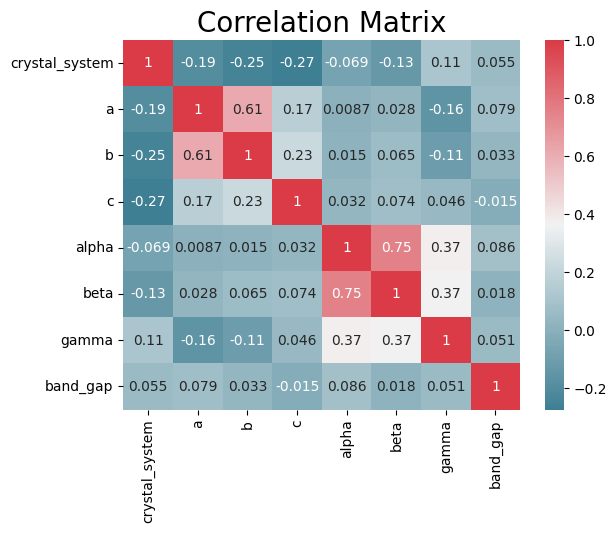

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("Correlation Matrix", fontsize=20)
plt.show()

In [ ]:
df.crystal_system.value_counts()

,count
crystal_system,
0,191
2,178
1,165
5,71
6,68
3,60
4,36


<Axes: xlabel='crystal_system', ylabel='count'>

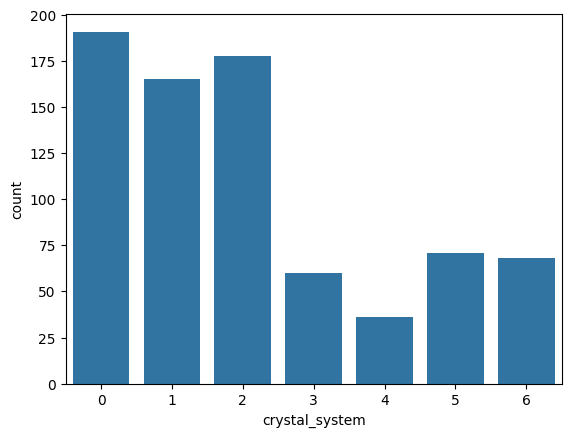

In [ ]:
sns.countplot(x=df['crystal_system'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = df.drop('band_gap',axis=1)
y=df['band_gap']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((615, 7), (154, 7), (615,), (154,))

In [ ]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

X_train,X_test

(array([[-1.06472048,  1.11560091,  0.85050735, ...,  0.10052445,
          0.00202885,  0.11957325],
        [-0.55114943, -0.70256447,  0.08500381, ..., -1.44094914,
          1.47338531,  1.58985613],
        [-0.55114943, -0.27698081, -0.46587804, ..., -1.8569124 ,
         -1.95889766, -1.41390231],
        ...,
        [-0.03757837, -0.59689431, -0.77845378, ...,  0.05930858,
          0.06421748,  0.05918914],
        [-1.06472048,  1.02705861,  0.80372333, ..., -0.14106396,
         -0.09390042, -0.04379151],
        [ 2.01670586, -0.14808644, -0.86997502, ...,  0.05930858,
          0.06421748, -0.04894055]]),
 array([[-1.06472048, -0.49238536, -0.51032286, ...,  1.31480744,
          0.1019276 , -1.3305816 ],
        [ 2.01670586, -0.42967999, -0.6100313 , ...,  0.05930858,
          0.06421748, -0.04894055],
        [-0.55114943, -0.40094003,  0.21892307, ...,  0.05930858,
         -2.01314731, -0.04894055],
        ...,
        [-1.06472048,  1.07582945,  0.9630814 , ...,  

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse, test_mse, train_r2, test_r2

(1.185473668635205,
 1.2269882065629711,
 0.02201757901394752,
 0.020737640694798443)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    'Linear Regression' : LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'K-Neighbors Regressor' : KNeighborsRegressor(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate model
    model_train_mae = np.mean(np.abs(y_train - y_train_pred))
    model_test_mae = np.mean(np.abs(y_test - y_test_pred))

    model_train_rmse = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
    model_test_rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))

    model_train_r2 = model.score(X_train, y_train)
    model_test_r2 = model.score(X_test, y_test)

    print(model_name)
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('=' * 35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1.0888
- Mean Absolute Error: 0.9484
- R2 Score: 0.0220
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.1077
- Mean Absolute Error: 0.9635
- R2 Score: 0.0207


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.1010
- Mean Absolute Error: 0.9639
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.1225
- Mean Absolute Error: 0.9802
- R2 Score: -0.0056


Ridge
Model performance for Training set
- Root Mean Squared Error: 1.0888
- Mean Absolute Error: 0.9485
- R2 Score: 0.0220
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.1077
- Mean Absolute Error: 0.9635
- R2 Score: 0.0207


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.8812
- Mean Absolute Error: 0.6926
- R2 Score: 0.3594
----------------------

In [ ]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
# from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import ShuffleSplit

In [ ]:
from sklearn.model_selection import GridSearchCV
estimators = [('svm',SVR()),('knn',KNeighborsRegressor()),('tree',DecisionTreeRegressor()),('linear',LinearRegression())]

def best_classifier_model(X,Y):
  algos={
      'linear_regression':{
          'model' : LinearRegression(),
          'params' : {
              'fit_intercept' : [True,False],
              # 'normalize' : [True,False]
          }
      },
      'decision_tree':{
          'model' : DecisionTreeRegressor(),
          'params' : {
              'criterion' : ["squared_error","absolute_error"],
              'splitter' : ['random','best'],
              'max_depth' : [3,5,7,10,None],
              "min_samples_split" : [10,20,30,40],
              'min_samples_leaf' : [1,5,10,15],
              # 'max_leaf_nodes' : [10,20,30,40]
          }
      },
      'knn':{
          'model' : KNeighborsRegressor(),
          'params' :{
              'n_neighbors' : [12,15,18,20],
              'weights' : ['uniform','distance'],
              # 'algorithm' : ['auto','ball_tree','kd_tree','brute'],

          }
      },
      'svc' :{
          'model' : SVR(),
          'params' :{
              'C' : [1,3,5,7,10],
              'kernel' : ['linear','rbf','poly','sigmoid'],
              'gamma' : ['auto','scale'],
              'degree' : [3,4,5],
          }
      },
      'random_forest' :{
          'model' : RandomForestRegressor(),
          'params' :{
              'n_estimators' : [50,75,100,125],
              'criterion' : ["squared_error","absolute_error"],
              'max_depth' : [10,15,20,None],
              'min_samples_split' : [5,10,15,20],
              'min_samples_leaf' : [5,10,15,20],
              'max_leaf_nodes' : [10,20,30,40],
              'bootstrap' : [True , False],
              'oob_score' : [True,False]
          }
      },
      'bagging' :{
          'model' : BaggingRegressor(),
          'params':{
              'estimator' : [SVR(),KNeighborsRegressor(),RandomForestRegressor()],
              'n_estimators' : [50,75,100,125],
              'max_samples' : [50,70,100,125],
              'bootstrap' : [True,False],
              'oob_score' : [True,False]
          }
      },
      'gradient_boosting' :{
          'model' : GradientBoostingRegressor(),
          'params' :{
              'loss' : ["squared_error","absolute_error"],
              'learning rate' : [0.0001,0.001,0.01],
              'n_estimators' : [50,75,100,125],
              'criterion' : ['friedman_mse', 'squared_error'],
              'min_samples_split' : [5,10,15,20],
              'min_samples_leaf' : [5,10,15,20],
              'max_depth' : [5,10,15,None],
              'max_leaf_nodes' : [10,20,30,40]
          }
      }
  }
  scores=[]
  cv = ShuffleSplit(n_splits=5,test_size=0.18,random_state=0)
  for algo_name,config in algos.items():
    gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
    gs.fit(X,y)

    scores.append({
        'model' : algo_name,
        'best_score' : gs.best_score_,
        'best_params' : gs.best_params_
    })

  return pd.DataFrame(scores,columns=['model','best_score','best_params'])
best_classifier_model(X,y)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
